# Contents

1. Fraud  Loan Prediction
2. Problem Definition
3. Data Analysis (EDA)
4. Pre-processing Pipeline
5. Building Machine Learning Models
6. Concluding Remarks

# 1. Fraud  Loan Prediction

# 2.Problem Definition

Whether to give loan to a person or not based on the information .


# 3. Data Analysis(EDA)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [21]:
df=pd.read_csv('Fraud _Loan_ Prediction.csv',na_values=".")

In [22]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [16]:
df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [27]:
df.shape

(614, 13)

In [23]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

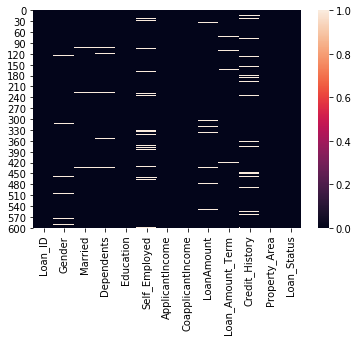

In [24]:
sns.heatmap(df.isnull())

In [25]:
df = df.replace(np.NaN,df.mean())

In [26]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [36]:
#Lets convert all categorical data into numerical data.
le = LabelEncoder()
list1 = ['Gender','Married','Dependents','Self_Employed',]
for val in list1:
    df[val] = le.fit_transform(df[val].astype(str))

In [31]:
df = df.replace(np.NaN,df.mean())

In [46]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

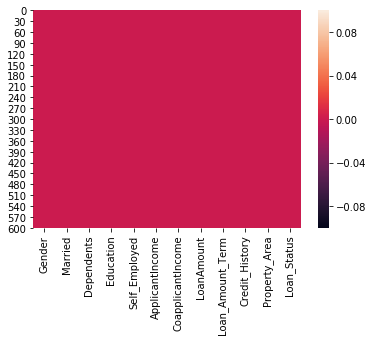

In [48]:
#lets check is there any nullvalues
sns.heatmap(df.isnull())

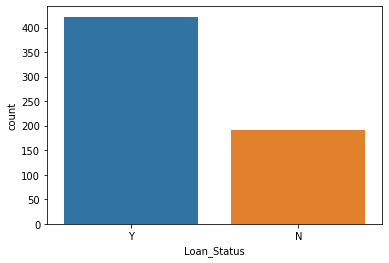

In [33]:
#Lets check the count of each class in taret variables.
sns.countplot(x='Loan_Status',data=df)
plt.show()

In [37]:
#Lets check data types
df.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education             object
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [41]:
#Lets convert all categorical data into numerical data.
le = LabelEncoder()
list1 = ['Education','Property_Area','Loan_Status']
for val in list1:
    df[val] = le.fit_transform(df[val].astype(str))
                               

In [42]:
df.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [43]:
#lets drop Loan_ID
df.drop('Loan_ID',axis=1,inplace=True)

In [44]:
df.shape

(614, 12)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               614 non-null int32
Married              614 non-null int32
Dependents           614 non-null int32
Education            614 non-null int32
Self_Employed        614 non-null int32
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null int32
Loan_Status          614 non-null int32
dtypes: float64(4), int32(7), int64(1)
memory usage: 40.9 KB


In [50]:
#Lets describe the data statistically
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.838762,0.657980,0.842020,0.218241,0.237785,5403.459283,1621.245798,146.412162,342.000000,0.842199,1.037459,0.687296
std,0.421752,0.484971,1.120531,0.413389,0.534737,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,2.000000,2.000000,4.000000,1.000000,2.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [51]:
#Lets check the correlation.
dfcor= df.corr()
dfcor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.336094,0.149674,0.024382,-0.025022,0.094472,0.073308,0.136081,-0.067778,-0.000490,-0.030903,0.008690
Married,0.336094,1.000000,0.338689,0.006759,-0.038153,0.052119,0.069877,0.145541,-0.096253,0.010302,0.007973,0.096657
Dependents,0.149674,0.338689,1.000000,0.060466,0.005622,0.103416,0.011146,0.130722,-0.073683,-0.077539,0.032600,-0.007318
Education,0.024382,0.006759,0.060466,1.000000,-0.021130,-0.140760,-0.062290,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,-0.025022,-0.038153,0.005622,-0.021130,1.000000,0.095664,0.052218,0.089806,-0.036965,0.052701,-0.013439,0.010880
ApplicantIncome,0.094472,0.052119,0.103416,-0.140760,0.095664,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.073308,0.069877,0.011146,-0.062290,0.052218,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.136081,0.145541,0.130722,-0.166998,0.089806,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.067778,-0.096253,-0.073683,-0.077242,-0.036965,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974
Credit_History,-0.000490,0.010302,-0.077539,-0.077936,0.052701,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.001880,0.540483


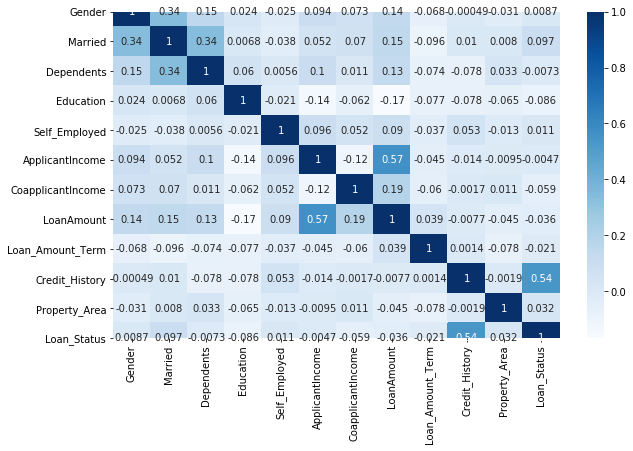

In [52]:
plt.figure(figsize = (10,6))
sns.heatmap(dfcor,cmap = 'Blues',annot = True)

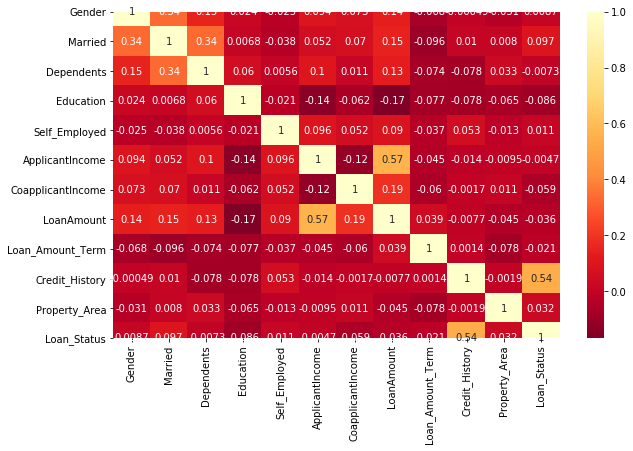

In [53]:
plt.figure(figsize = (10,6))
sns.heatmap(dfcor,cmap ='YlOrRd_r',annot = True)

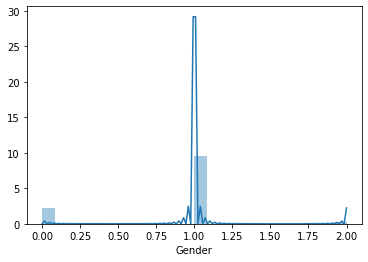

In [55]:
#Lets do univariate analysis
sns.distplot(df['Gender'])

--male candidates are more in number.

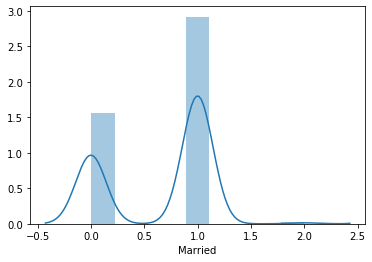

In [58]:
sns.distplot(df['Married'])

In [ ]:


collist=df.columns.values
ncol=15
nrows=15

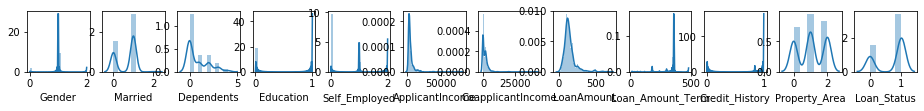

In [60]:
plt.figure(figsize=(20,20))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

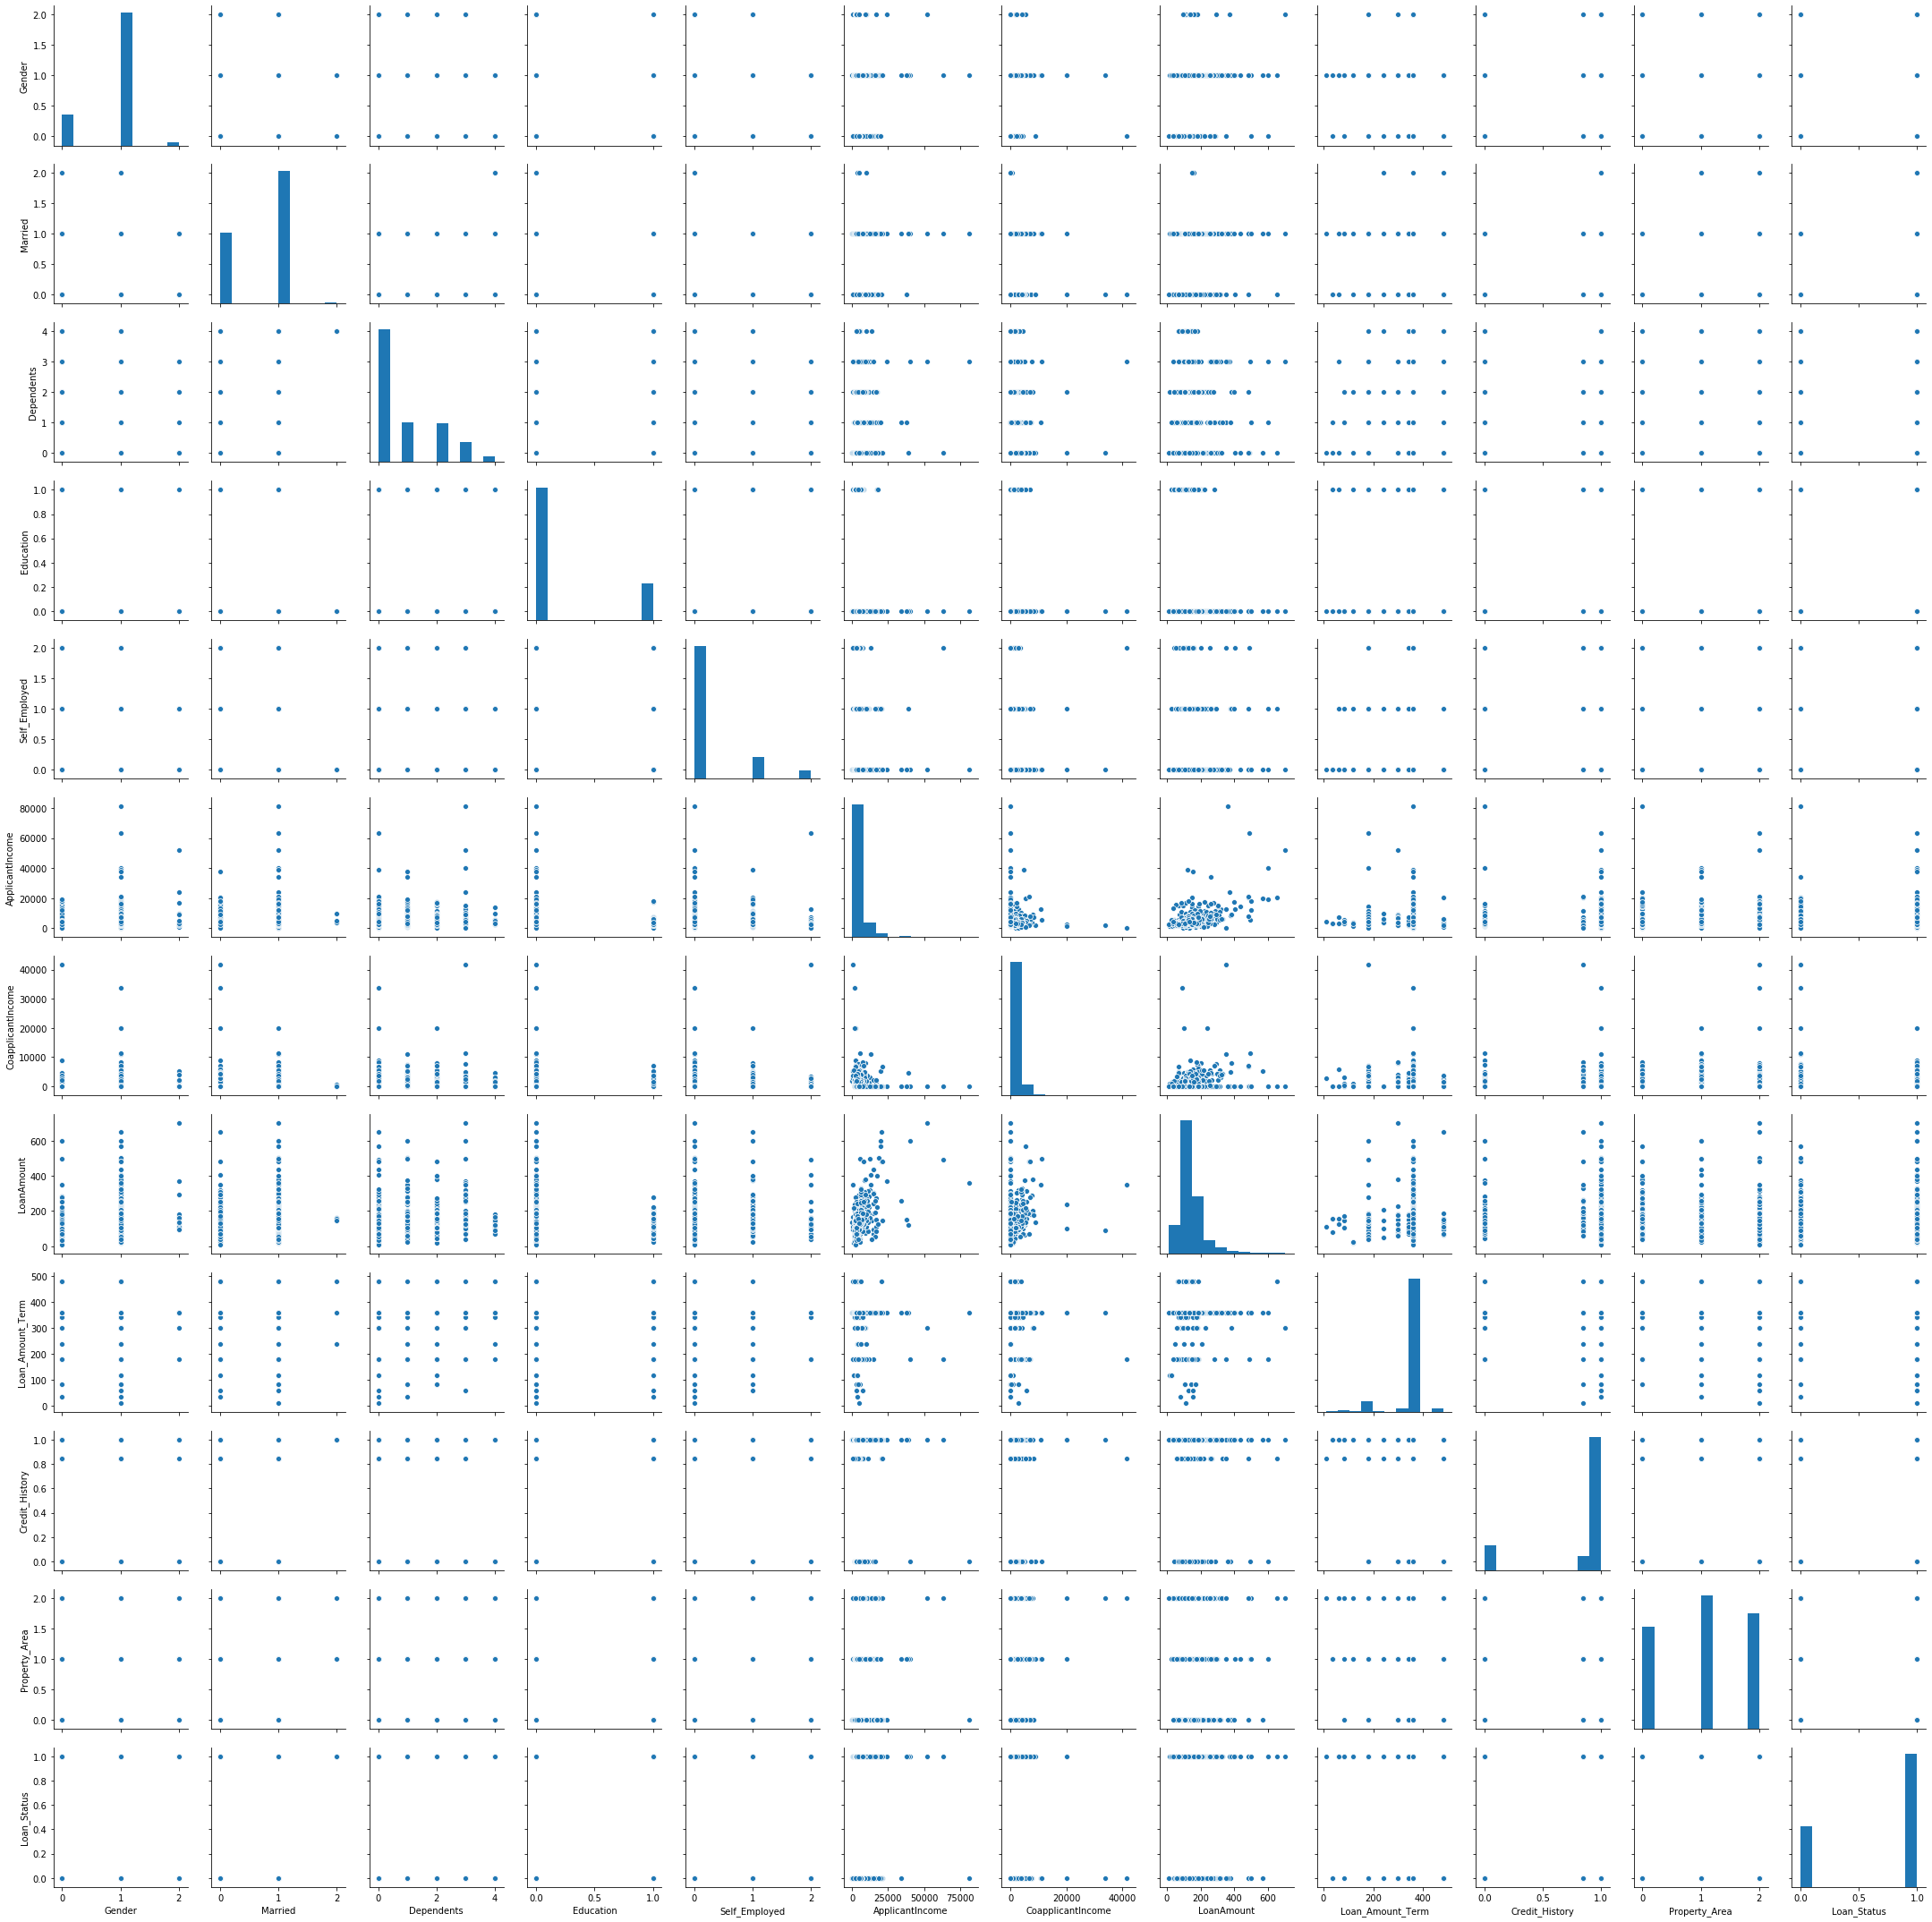

In [61]:
sns.pairplot(df)

In [62]:
#Now lets check the skewness
df.skew()

Gender              -0.953015
Married             -0.538097
Dependents           1.089068
Education            1.367622
Self_Employed        2.191118
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [65]:
#Treating using log
import numpy as np
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col] = np.log1p(df[col])

In [66]:
#lets again check the skewness
df.skew()

Gender              -0.953015
Married             -0.538097
Dependents           0.462324
Education            1.367622
Self_Employed        1.755362
ApplicantIncome      0.482128
CoapplicantIncome   -0.173073
LoanAmount          -0.179713
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

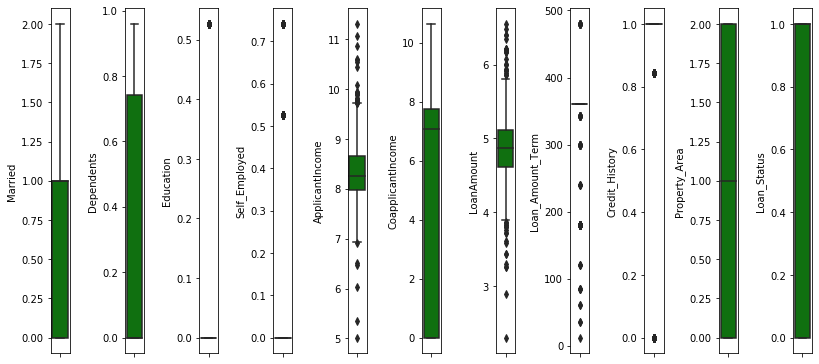

In [67]:
#Lets visualize outliers through boxplots
plt.figure(figsize=(ncol,5*ncol))
for i in range (1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [68]:
#Lets do bivariate analysis with target variable.

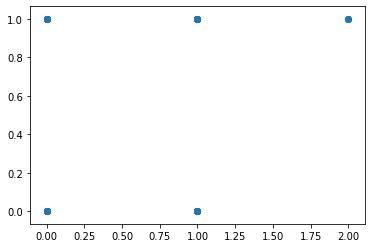

In [69]:
plt.scatter(df['Married'],df['Loan_Status'])

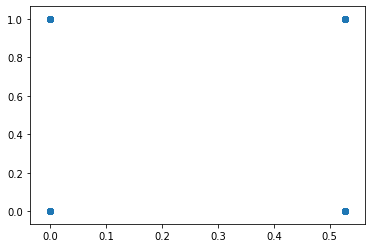

In [70]:
plt.scatter(df['Education'],df['Loan_Status'])

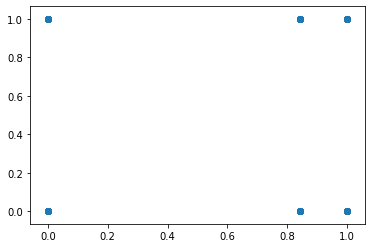

In [71]:
plt.scatter(df['Credit_History'],df['Loan_Status'])

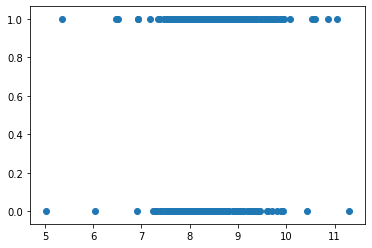

In [73]:
plt.scatter(df['ApplicantIncome'],df['Loan_Status'])

# 4. Pre-processing Pipeline

In [74]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.38261602, 1.35784704, 0.85049178, ..., 0.45164045, 1.22329839,
        0.67451931],
       [0.38261602, 0.70581158, 0.61747064, ..., 0.45164045, 1.31851281,
        1.48253724],
       [0.38261602, 0.70581158, 0.85049178, ..., 0.45164045, 1.22329839,
        0.67451931],
       ...,
       [0.38261602, 0.70581158, 0.61747064, ..., 0.45164045, 1.22329839,
        0.67451931],
       [0.38261602, 0.70581158, 1.21595036, ..., 0.45164045, 1.22329839,
        0.67451931],
       [1.99037625, 1.35784704, 0.85049178, ..., 2.41044061, 0.04760721,
        1.48253724]])

In [75]:
threshold=3
print(np.where(z>3))

(array([ 14,  14,  68,  94,  94, 130, 133, 133, 155, 155, 171, 171, 183,
       185, 216, 242, 262, 313, 333, 369, 409, 443, 468, 495, 497, 546,
       555, 561, 568, 575, 585, 600], dtype=int64), array([7, 8, 8, 7, 8, 7, 7, 8, 5, 7, 5, 7, 5, 5, 5, 8, 8, 8, 5, 7, 5, 5,
       5, 8, 8, 8, 7, 7, 7, 8, 8, 5], dtype=int64))


In [76]:
df_new=df[((z<3).all(axis=1))] #Removing the outliers
df_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.000000,0.000000,0.000000,8.674197,0.000000,4.993232,360.0,1.0,2,1
1,1,1,0.526589,0.000000,0.000000,8.430327,7.319202,4.859812,360.0,1.0,0,0
2,1,1,0.000000,0.000000,0.526589,8.006701,0.000000,4.204693,360.0,1.0,2,1
3,1,1,0.000000,0.526589,0.000000,7.857094,7.765993,4.795791,360.0,1.0,2,1
4,1,0,0.000000,0.000000,0.000000,8.699681,0.000000,4.955827,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.000000,0.000000,0.000000,7.972811,0.000000,4.276666,360.0,1.0,0,1
610,1,1,0.869742,0.000000,0.000000,8.320448,0.000000,3.713572,180.0,1.0,0,1
611,1,1,0.526589,0.000000,0.000000,8.996280,5.484797,5.537334,360.0,1.0,2,1
612,1,1,0.741276,0.000000,0.000000,8.933796,0.000000,5.236442,360.0,1.0,2,1


In [77]:
df.shape

(614, 12)

In [78]:
df_new.shape

(587, 12)

In [79]:
#Now lets train and test our data. Here our target variable is y i.e Loan_Status, and our input variables is x

In [80]:
x=df_new.iloc[:,:-1]

In [81]:
df1_x=x

In [82]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0.000000,0.000000,0.000000,8.674197,0.000000,4.993232,360.0,1.0,2
1,1,1,0.526589,0.000000,0.000000,8.430327,7.319202,4.859812,360.0,1.0,0
2,1,1,0.000000,0.000000,0.526589,8.006701,0.000000,4.204693,360.0,1.0,2
3,1,1,0.000000,0.526589,0.000000,7.857094,7.765993,4.795791,360.0,1.0,2
4,1,0,0.000000,0.000000,0.000000,8.699681,0.000000,4.955827,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.000000,0.000000,0.000000,7.972811,0.000000,4.276666,360.0,1.0,0
610,1,1,0.869742,0.000000,0.000000,8.320448,0.000000,3.713572,180.0,1.0,0
611,1,1,0.526589,0.000000,0.000000,8.996280,5.484797,5.537334,360.0,1.0,2
612,1,1,0.741276,0.000000,0.000000,8.933796,0.000000,5.236442,360.0,1.0,2


In [83]:
y=df_new[['Loan_Status']]

In [84]:
y.shape

(587, 1)

In [85]:
#Scaling the input variable
#Algorithm requires all features to be on common scale

In [86]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

x = scale.fit_transform(x)

In [87]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=42)

In [88]:
x_train.shape

(393, 11)

In [89]:
y_train.shape

(393, 1)

In [90]:
y_test.shape

(194, 1)

In [91]:
x_test.shape

(194, 11)

# 5.Building Machine Learning Model

In [94]:
lg = LogisticRegression()
lg = LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print(pred)
print('accuracy_score:',accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0
 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1]
accuracy_score: 0.8144329896907216
[[ 23  34]
 [  2 135]]
              precision    recall  f1-score   support

           0       0.92      0.40      0.56        57
           1       0.80      0.99      0.88       137

    accuracy                           0.81       194
   macro avg       0.86      0.69      0.72       194
weighted avg       0.83      0.81      0.79       194



In [95]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)
predgnb = gnb.predict(x_test)
print(accuracy_score(predgnb,y_test))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.8144329896907216
[[ 23  34]
 [  2 135]]
              precision    recall  f1-score   support

           0       0.92      0.40      0.56        57
           1       0.80      0.99      0.88       137

    accuracy                           0.81       194
   macro avg       0.86      0.69      0.72       194
weighted avg       0.83      0.81      0.79       194



In [96]:
#doing gridsearch to find best parameter

In [97]:
#Grid Search for Algorithm Tuning

from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

dataset = df
parameters = {'kernel':('linear','rbf','poly'),'C':[1,10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(x,y)
print(clf.best_score_)
print(clf.best_estimator_.kernel)
print(clf.best_params_)


0.8160136286201022
linear
{'C': 1, 'kernel': 'linear'}


In [103]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
grid_param = {
    'criterion':['gini','entropy']
}

#gridk = {'kernel' :['linear','rbf','ploy']}
gd_sr = GridSearchCV(estimator=dtc,
                    param_grid=grid_param,
                    scoring='accuracy')
gd_sr.fit(x,y)

best_parameters = gd_sr.best_params_
print(best_parameters)
best_result = gd_sr.best_score_
print(best_result)

{'criterion': 'gini'}
0.7410562180579217


In [105]:
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier()
param_grid ={
    'n_neighbors':[1,2,3,4,5],
    'weights':['uniform', 'distance'],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
}


gd_sr = GridSearchCV(estimator=knn,
                    param_grid=param_grid,
                    scoring='accuracy',cv=5)

gd_sr.fit(x,y)

best_parameters = gd_sr.best_params_
print(best_parameters)
best_result = gd_sr.best_score_
print(best_result)

{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
0.797274275979557


In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

gd_sr = GridSearchCV(estimator=rf,
                    param_grid=param_grid,
                    scoring='accuracy',cv=5)
gd_sr.fit(x,y)

best_parameters = gd_sr.best_params_
print(best_parameters)
best_result = gd_sr.best_score_
print(best_result)

{'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 500}
0.8160136286201022


In [108]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear',C=1)
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print('actual and predicted value score',accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

actual and predicted value score 0.8144329896907216
[[ 23  34]
 [  2 135]]
              precision    recall  f1-score   support

           0       0.92      0.40      0.56        57
           1       0.80      0.99      0.88       137

    accuracy                           0.81       194
   macro avg       0.86      0.69      0.72       194
weighted avg       0.83      0.81      0.79       194



In [109]:
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier(n_neighbors=5,weights='uniform',algorithm='auto')
Knn.fit(x_train,y_train)
predknn = Knn.predict(x_test)
predknn
print('accuracy_score',accuracy_score(predknn,y_test))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

accuracy_score 0.7783505154639175
[[ 24  33]
 [ 10 127]]
              precision    recall  f1-score   support

           0       0.71      0.42      0.53        57
           1       0.79      0.93      0.86       137

    accuracy                           0.78       194
   macro avg       0.75      0.67      0.69       194
weighted avg       0.77      0.78      0.76       194



In [110]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion='gini')
dct.fit(x_train,y_train)
preddct = dct.predict(x_test)
preddct
print('accuracy_score',accuracy_score(preddct,y_test))
print(confusion_matrix(y_test,preddct))
print(classification_report(y_test,preddct))

accuracy_score 0.6649484536082474
[[ 22  35]
 [ 30 107]]
              precision    recall  f1-score   support

           0       0.42      0.39      0.40        57
           1       0.75      0.78      0.77       137

    accuracy                           0.66       194
   macro avg       0.59      0.58      0.59       194
weighted avg       0.66      0.66      0.66       194



In [111]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500,max_features ='auto',max_depth = 4,criterion='gini')

rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
predrf

print('predicted',predrf)
print('actual',y_test)

print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

predicted [1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0
 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1]
actual      Loan_Status
540            1
296            1
532            0
345            1
220            0
..           ...
154            1
127            1
594            1
467            1
194            1

[194 rows x 1 columns]
0.8144329896907216
[[ 23  34]
 [  2 135]]
              precision    recall  f1-score   support

           0       0.92      0.40      0.56        57
           1       0.80      0.99      0.88       137

    accuracy                           0.81       194
   macro avg       0.86      0.69      0.72       194
weighted avg       0.83      0.81      0.79   

In [112]:
#Cross Validating to avoid overfitting and under fitting of the model.

In [113]:
from sklearn.model_selection import cross_val_score

score= cross_val_score(gnb,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.80508475 0.79661017 0.77966102 0.86324786 0.82758621]
0.8144380004695609
0.028879167406470778


In [114]:
from sklearn.model_selection import cross_val_score

score= cross_val_score(svc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.80508475 0.79661017 0.77966102 0.86324786 0.8362069 ]
0.8161621384005955
0.029853568620243437


In [115]:
from sklearn.model_selection import cross_val_score

score= cross_val_score(Knn,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.77966102 0.77118644 0.79661017 0.83760684 0.80172414]
0.7973577205313033
0.022968348071474423


In [116]:
from sklearn.model_selection import cross_val_score

score= cross_val_score(dct,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.73728814 0.61016949 0.77118644 0.76923077 0.73275862]
0.7241266915434069
0.059132013425615915


In [117]:
from sklearn.model_selection import cross_val_score

score= cross_val_score(rf,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.80508475 0.79661017 0.77966102 0.86324786 0.82758621]
0.8144380004695609
0.028879167406470778


In [118]:
#Lets save the best model.

In [119]:
from sklearn.externals import joblib
joblib.dump(rf,'rfsalary.obj')
rf_from_joblib = joblib.load('rfsalary.obj')
rf_from_joblib.predict(x_test)

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# 6.Conclusion

-credit history is highly positively correlated than any other variable to output which mean it is very important for loan_fraud.

-- married candidates are more.

--male candidates are more.

-- coapplicant is negatively correlated.